In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


##Image Preprocessing

##Import ImageDataGenerator Library And Configure It

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale = 1./255)

##Apply ImageDataGenerator Functionality To Train And Test Set

In [ ]:
x_train = train_datagen.flow_from_directory('/content/drive/MyDrive/IBM-Project-321-1658278283-main/Data Collection/Train_Set', target_size=(64,64), batch_size=300,class_mode='categorical', color_mode = "grayscale")
x_test = test_datagen.flow_from_directory('/content/drive/MyDrive/IBM-Project-321-1658278283-main/Data Collection/Test_set', target_size=(64,64), batch_size=300,class_mode='categorical', color_mode = "grayscale")

Found 14928 images belonging to 9 classes.
Found 2250 images belonging to 9 classes.


##Testing

##Import The Required Model Building Libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

##Initialize The Model

In [ ]:
model=Sequential()

##Add The Convolution Layer

In [ ]:
model.add(Convolution2D(32, (3,3), input_shape=(64,64,1), activation= 'relu'))
#no. of feature detectors, size of featuredetector, image size, activation function

##Add The Pooling Layer

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

##Add The Flatten Layer

In [ ]:
model.add(Flatten())

##Adding The Dense Layers

In [ ]:
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=9, activation='softmax'))

##Compile The Model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##Fit And Save The Model

In [ ]:
model.fit_generator(x_train, steps_per_epoch=24, epochs=10, validation_data=x_test, validation_steps=40)
#steps_per_epoch = no.of train images//batch size

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 1.4679 - accuracy: 0.6028 

24/24 [==============================] - 1069s 45s/step - loss: 1.4679 - accuracy: 0.6028 - val_loss: 0.4708 - val_accuracy: 0.8822
Epoch 2/10
24/24 [==============================] - 429s 18s/step - loss: 0.3554 - accuracy: 0.9094
Epoch 3/10
24/24 [==============================] - 216s 9s/step - loss: 0.1793 - accuracy: 0.9540
Epoch 4/10
24/24 [==============================] - 124s 5s/step - loss: 0.1149 - accuracy: 0.9710
Epoch 5/10
24/24 [==============================] - 74s 3s/step - loss: 0.0859 - accuracy: 0.9778
Epoch 6/10
24/24 [==============================] - 52s 2s/step - loss: 0.0689 - accuracy: 0.9809
Epoch 7/10
24/24 [==============================] - 42s 2s/step - loss: 0.0529 - accuracy: 0.9850
Epoch 8/10
24/24 [==============================] - 42s 2s/step - loss: 0.0432 - accuracy: 0.9890
Epoch 9/10
24/24 [==============================] - 42s 2s/step - loss: 0.0410 - accuracy: 0.9876
Epoch 10/10
24/24 [==============================] - 40s 2s/step - loss: 0.0355 

In [ ]:
model.save('aslpng1.h5')

##Testmodel

##Import The Packages And Load The Saved Model

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [18]:
model=load_model('aslpng1.h5')

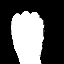

In [19]:
img = image.load_img('/content/drive/MyDrive/IBM-Project-321-1658278283-main/Data Collection/Test_set/E/1.png')
img

##Load The Test Image, Pre-Process It And Predict

In [20]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [ ]:
img=image.load_img("/content/drive/MyDrive/IBM-Project-321-1658278283-main/Data Collection/Test_set/D/100.png")
detect(img)

In [ ]:
img=image.load_img("/content/drive/MyDrive/IBM-Project-321-1658278283-main/Data Collection/Test_set/G/1.png")
detect(img)